# Existe relação diretamente o IBC-Br e o PIB?

# O que é o PIB?

O Produto Interno Bruto (PIB) representa o total de todos os bens e serviços finais gerados em um país, estado ou cidade, tipicamente calculados anualmente. Cada nação avalia seu PIB em sua própria moeda. Por exemplo, o PIB do Brasil alcançou R\$ 10,1 trilhões em 2022, e no terceiro trimestre de 2023, este valor atingiu R\$ 2.741,0 bilhões.

Para calcular o PIB, apenas os bens e serviços finais são contabilizados, evitando assim a contagem dupla. Por exemplo, se um país produzir trigo no valor de R\$ 100, farinha de trigo por R\$ 200 e pão por R\$ 300, o PIB será contado como R\$ 300. Isso acontece porque o valor do trigo e da farinha já está incluído no preço final do pão.

Importante destacar, o PIB mede esses bens e serviços finais a preços de consumidor, o que inclui os impostos embutidos nos produtos comercializados.

É um equívoco comum confundir o PIB com a riqueza total de um país. O PIB não reflete o 'estoque' de riqueza existente, mas sim um 'fluxo' de novos bens e serviços produzidos em um determinado período. Portanto, se em um ano um país não produzir nada, seu PIB será zero.

# O que é o IBC-Br?

O Índice de Atividade Econômica do Banco Central (IBC-Br) é uma métrica desenvolvida pelo Banco Central do Brasil (BACEN) para monitorar e antecipar tendências na economia brasileira. Ele serve como um indicador de desempenho econômico, refletindo a atividade em diversos setores da economia em um determinado período, geralmente mensal.

O IBC-Br é calculado com base em uma variedade de indicadores, incluindo os níveis de produção industrial, vendas no varejo e serviços, entre outros. Ao contrário do Produto Interno Bruto (PIB), que é calculado trimestralmente, o IBC-Br fornece uma visão mais frequente e atualizada da economia.

Este índice é particularmente útil para os formuladores de políticas econômicas e investidores, pois oferece uma visão preliminar da direção em que a economia está se movendo, antes mesmo da divulgação oficial do PIB. Isso permite reações e ajustes mais rápidos às tendências econômicas.

É importante destacar que, embora o IBC-Br seja um indicador abrangente, ele não mede todos os aspectos da economia. Por exemplo, ele não inclui dados sobre a economia informal. Além disso, assim como o PIB, o IBC-Br não deve ser confundido com um indicador de riqueza ou bem-estar, mas sim como um reflexo do nível de atividade econômica.

---

Após compreendermos os conceitos e os fatores determinantes que influenciam cada um dos indicadores econômicos, uma questão relevante emerge: existe uma forte correlação entre o IBC-Br, considerado uma prévia do PIB, e o próprio PIB? Para responder a esta pergunta, vamos usar o Python como ferramenta de coleta, tratamento, análise e modelagem dos dados para verificar esse argumento.

## Importando bibliotecas

In [1]:
# Pandas: Data manipulation and analysis library.
# https://pandas.pydata.org
try:
    import pandas as pd
except ModuleNotFoundError:
    print('Pandas is not installed, installing now...')
    %pip install pandas
finally:
    import pandas as pd

In [2]:
# Matplotlib: Data visualization library
# https://matplotlib.org
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    print('Matplotlib is not installed, installing now...')
    %pip install matplotlib
finally:
    import matplotlib.pyplot as plt

In [3]:
# Sidrapy: Brazilian IBGE data extraction library
# https://sidrapy.readthedocs.io/pt-br/latest
try:
    import sidrapy as sd
except ModuleNotFoundError:
    print('Sidrapy is not installed, installing now...')
    %pip install sidrapy
finally:
    import sidrapy as sd

In [4]:
# Statsmodels: Statistical modeling and econometrics library
# https://www.statsmodels.org/stable/index.html
try:
    import statsmodels.api as sm
except ModuleNotFoundError:
    print('Statsmodels is not installed, installing now...')
    %pip install statsmodels
finally:
    import statsmodels.api as sm

In [5]:
# Configuring Matplotlib to display graphics inline.
%matplotlib inline

In [6]:
# Definir o tamanho padrão para todos os gráficos.
plt.rcParams['figure.figsize'] = (14, 5)
# Definir a cor de fundo padrão para todos os gráficos
plt.rcParams['figure.facecolor'] = 'white'

## Índice de Atividade Econômica do Banco Central (IBC-Br)

In [7]:
# Para obter a série histórica do IBC-Br vamos utilizar a API de Dados Abertos do Banco Central do Brasil. 
ibc_br = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.24363/dados?formato=json')
# Ajustando o formato da data e definindo-a como índice do DataFrame.
ibc_br['data'] = pd.to_datetime(ibc_br['data'], dayfirst=True, format='%d/%m/%Y')
ibc_br.set_index('data', inplace=True)

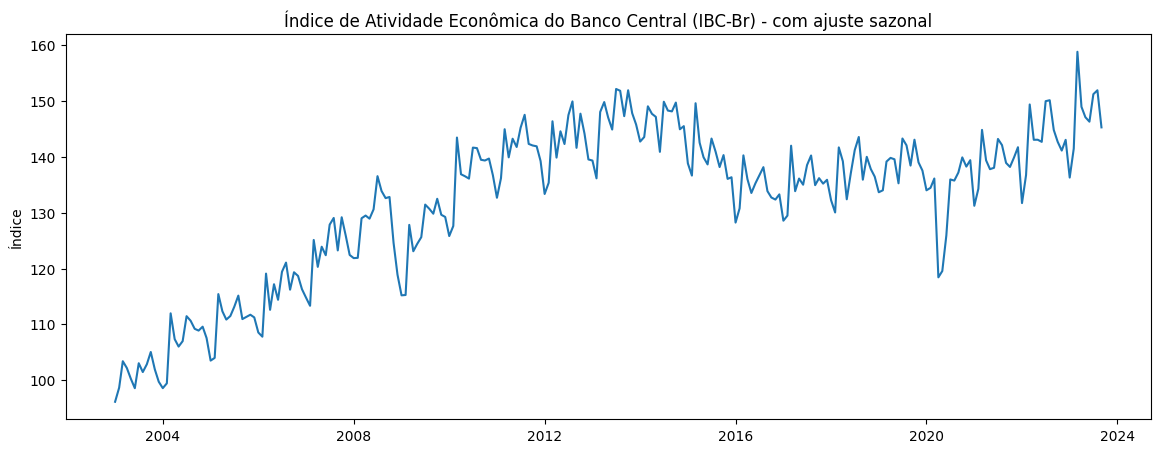

In [8]:
# Visualizando a série histórica do IBC-Br.
plt.plot(ibc_br.index, ibc_br['valor'])
plt.title('Índice de Atividade Econômica do Banco Central (IBC-Br) - com ajuste sazonal')
plt.ylabel('Índice')
plt.show()


## Produto Interno Bruto (PIB) sem ajuste sazonal

In [9]:
def get_pib_data_from_ibge(table_code: str) -> pd.DataFrame:
    """Obtém e processa dados do Produto Interno Bruto (PIB) a partir de uma tabela do IBGE.

    Utiliza a biblioteca Sidrapy para acessar os dados de uma tabela específica do IBGE. 
    A função transforma e ajusta esses dados para uma forma mais útil, focando-se nas colunas 
    de data e valor do PIB.

    Parâmetros:
    table_code (str): Código da tabela do IBGE que contém os dados do PIB desejados.

    Processo:
    1. Os dados são obtidos usando o método `get_table` do Sidrapy, especificando o nível territorial, 
       código territorial do IBGE, período e classificação.
    2. As colunas são renomeadas para serem mais descritivas e apenas as colunas relevantes são mantidas.
    3. O tipo da coluna 'Valor' é ajustado para float.
    4. A coluna 'data' é ajustada para indicar o mês correspondente ao trimestre.
    5. A coluna 'data' é convertida para o tipo datetime e definida como índice do DataFrame.

    Retorna:
    pandas.DataFrame: Um DataFrame com duas colunas, 'data' e 'PIB', onde 'data' é o índice e 
                      representa as datas (ajustadas para o mês correspondente ao trimestre) e 
                      'PIB' contém os valores do Produto Interno Bruto.

    Exemplo de uso:
    >>> pib_data = get_pib_data_from_ibge('1621')
    """

    # Usando o Sidrapy para obter os dados do PIB.
    response_raw = sd.get_table(table_code=table_code,
                                territorial_level="1",
                                ibge_territorial_code="all",
                                period="all",
                                classification="11255/90707")

    # Renomeando as colunas e selecionando apenas as colunas de interesse.
    # Substituindo os nomes das colunas pelo conteúdo da primeira linha.
    response_raw = response_raw.rename(columns=response_raw.iloc[0]).iloc[1:]

    # Ajustando o tipo da coluna 'Valor' para float.
    response_raw['Valor'] = response_raw['Valor'].astype(float)

    # Selecionando apenas as colunas de interesse.
    response = response_raw.rename(columns={'Valor': 'PIB',
                                            'Trimestre (Código)': 'data'})[['data', 'PIB']]

    # Transformando a indicação de trimestre para o mês correspondente.
    response['data'] = response['data'].str[:-2] + response['data'].str[-2:].replace({"01": "03",
                                                                                      "02": "06",
                                                                                      "03": "09",
                                                                                      "04": "12"})

    # Ajustando o formato da data e definindo-a como índice do DataFrame.
    response['data'] = pd.to_datetime(response['data'], format='%Y%m')
    response.set_index('data', inplace=True)

    return response

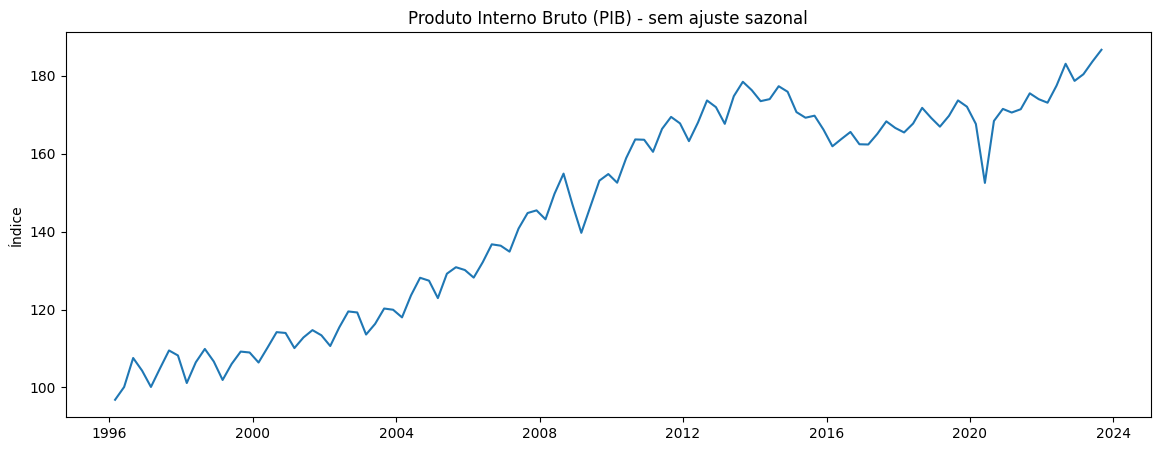

In [10]:
# Usando o Sidrapy para obter a tabela 1620 do IBGE.
# Tabela: 1620 - Série encadeada do índice de volume trimestral (Base: média 1995 = 100)
pib = get_pib_data_from_ibge('1620')

# Visualizando a série histórica do PIB.
plt.plot(pib.index, pib['PIB'])
plt.title('Produto Interno Bruto (PIB) - sem ajuste sazonal')
plt.ylabel('Índice')
plt.show()

## Produto Interno Bruto (PIB) com ajuste sazonal

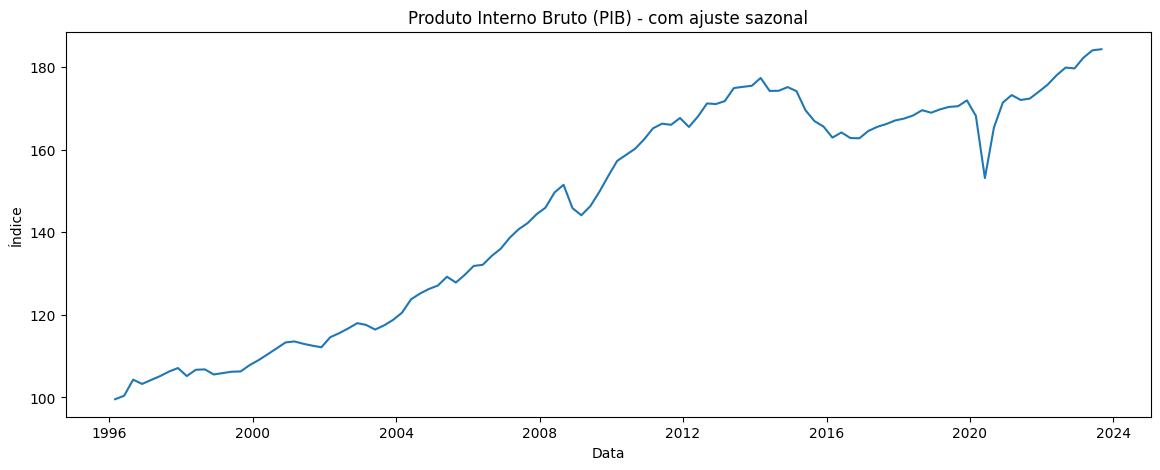

In [11]:
# Usando o Sidrapy para obter a tabela 1621 do IBGE.
# Tabela: 1621 - Série encadeada do índice de volume trimestral com ajuste sazonal (Base: média 1995 = 100)
pib_sa = get_pib_data_from_ibge('1621')

# Visualizando a série histórica do PIB com ajuste sazonal.
plt.plot(pib_sa.index, pib_sa['PIB'])
plt.title('Produto Interno Bruto (PIB) - com ajuste sazonal')
plt.xlabel('Data')
plt.ylabel('Índice')
plt.show()

## Comparando o PIB e o PIB dessazonalizado

In [12]:
# Criando um DataFrame contemplando as duas séries históricas.
pib_df = pd.merge(pib, pib_sa, how='outer', left_index=True, right_index=True)

# Renomeando as colunas.
pib_df.columns = ['PIB', 'PIB_SA']

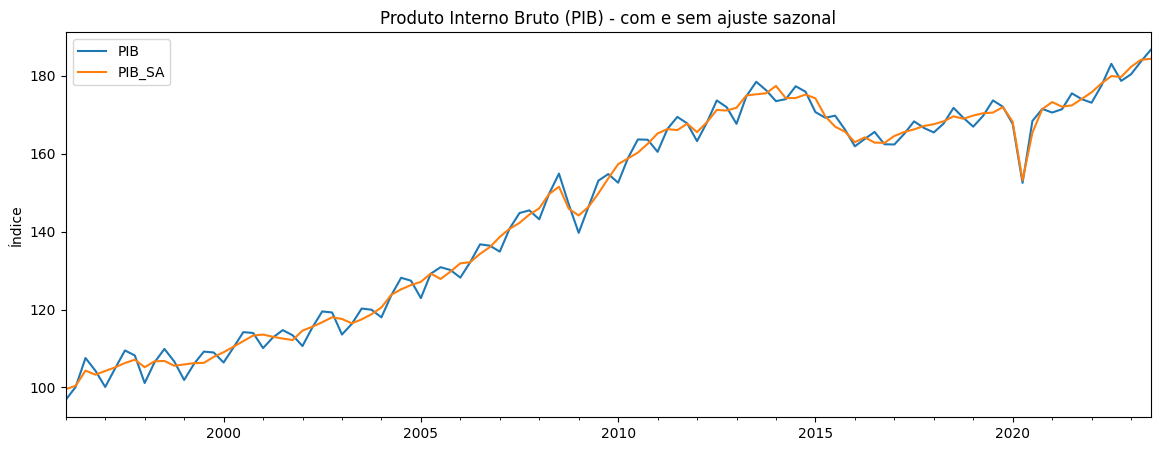

In [13]:
fig, ax = plt.subplots()
pib_df.plot(ax=ax, title='Produto Interno Bruto (PIB) - com e sem ajuste sazonal')
ax.set_xlabel('')
ax.set_ylabel('Índice')
plt.show()

# Como comparar o IBC-br e o PIB?

Para efetuar uma comparação adequada entre o IBC-Br e o PIB, é necessário realizar ajustes específicos nos dados de ambos os índices. Nosso foco será analisar as **variações marginais** de cada um deles. Isso significa que estamos interessados em entender como pequenas alterações em um período influenciam as mudanças observadas em ambos os indicadores. Este exercício nos permitirá avaliar como o IBC-Br, frequentemente visto como um preditor do PIB, reflete as flutuações econômicas e sua correspondência com as alterações registradas no PIB.

O caminho para realizar a comparação passar por dois passo específicos:
1. Calcular a média do trimestre
2. Calcular a variação marginal do trimestre

In [14]:
# Agrupando os dados por trimestre e calculando a média.
ibc_br_trimestral = ibc_br.resample('Q').mean()

# Calculando a variação percentual do IBC-Br em relação ao trimestre anterior.
ibc_br_variação_marginal = ibc_br_trimestral.diff()

In [15]:
# Calculando a variação percentual do PIB em relação ao trimestre anterior.
pib_variação_marginal = pib_df.diff()

In [16]:
# Padronizando as datas para o último dia mês.
pib_variação_marginal.index = pib_variação_marginal.index.to_period('M').to_timestamp('M')

In [17]:
# Criando um DataFrame contemplando todas as séries históricas.
df = pd.merge(ibc_br_variação_marginal, pib_variação_marginal.query(
    f"data > '{ibc_br_variação_marginal.iloc[0].name.date().strftime('%Y-%m-%d')}'"),
    how='outer',
    left_index=True,
    right_index=True)

# Renomeando as colunas.
df.columns = ['IBC-Br', 'PIB', 'PIB_SA']

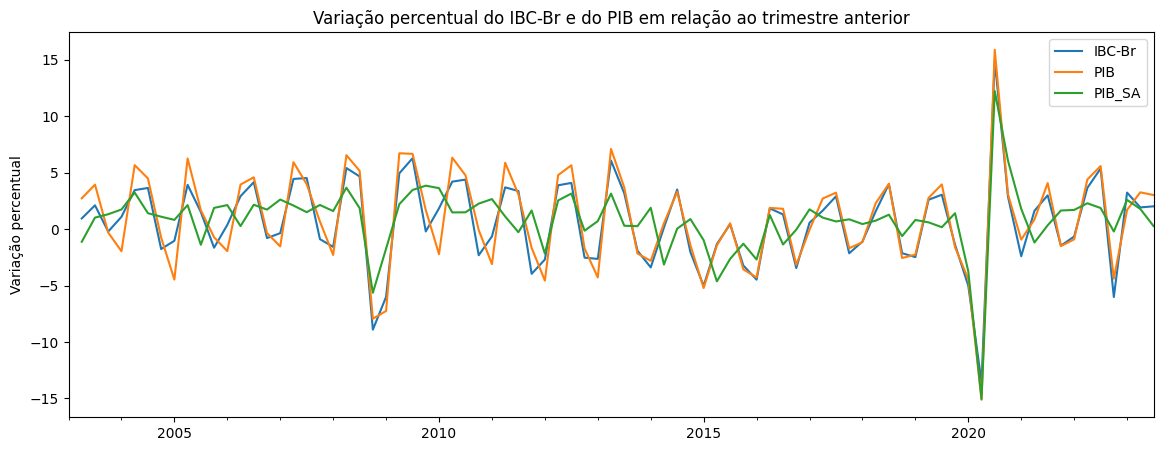

In [18]:
fig, ax = plt.subplots()
df.plot(ax=ax, title='Variação percentual do IBC-Br e do PIB em relação ao trimestre anterior')
ax.set_xlabel('')
ax.set_ylabel('Variação percentual')
plt.show()

Comparando a evolução temporal do IBC-Br e do PIB, nota-se que ambos os indicadores tendem a se mover em consonância, sugerindo uma sincronia nas suas flutuações. Essa observação nos leva a questionar se o IBC-Br pode ser considerado um preditor confiável do PIB. Para abordar essa questão de forma objetiva, é necessário empregar um modelo estatístico de regressão que possa quantificar a relação entre as séries temporais dos dois índices, levando em conta não apenas a correlação direta, mas também outros fatores que possam influenciar essa dinâmica.

In [19]:
# Removendo linhas com valores ausentes.
df.dropna(inplace=True)

In [20]:
# Estruturando o modelo de regressão linear.
ols_model = sm.OLS(df['PIB'], df['IBC-Br'])
# Ajustando o modelo.
ols_model_fit = ols_model.fit()
ols_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    PIB   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              907.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                    9.15e-46
Time:                        21:12:57   Log-Likelihood:                         -135.93
No. Observations:                  82   AIC:                                      273.9
Df Residuals:                      81   BIC:                                      276.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IBC-Br         1.0788      0.036     30.125      0.000       1.008       1.150
==============================================================================
Omnibus:                       18.525   Durbin-Watson:                   2.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.114
Skew:                          -1.003   Prob(JB):                     3.52e-06
Kurtosis:                       4.825   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A análise dos resultados da regressão linear OLS (Ordinary Least Squares) que examina a relação entre o PIB (Produto Interno Bruto) e o IBC-Br (indicador econômico brasileiro) oferece insights significativos. Primeiramente, os altos valores de R-squared (0.918) e Adjusted R-squared (0.917) demonstram que o modelo explica aproximadamente 91.8% da variação do PIB, indicando uma forte correlação entre as duas variáveis. Além disso, o coeficiente de 1.0788 para o IBC-Br sugere que um aumento de uma unidade no IBC-Br resulta em um aumento de 1.0788 unidades no PIB, considerando outros fatores constantes. O intervalo de confiança de 95% para este coeficiente, variando de 1.008 a 1.150, reforça a precisão desta estimativa. A significância do modelo é ainda apoiada pelo F-statistic de 907.5 e uma Probabilidade (Prob (F-statistic)) quase nula (9.15e-46), indicando que a relação entre IBC-Br e PIB não é casual.

No entanto, os testes de diagnóstico revelam preocupações potenciais com a distribuição dos resíduos (erros) do modelo. O teste Omnibus e o teste Jarque-Bera, ambos com valores significativos (18.525 e 25.114, respectivamente) e probabilidades quase nulas, indicam que os resíduos não seguem uma distribuição normal. Isso é corroborado pela assimetria moderada (Skew de -1.003) e pela alta curtose (Kurtosis de 4.825), sugerindo uma distribuição atípica dos erros. O teste Durbin-Watson, com um valor de 2.995, aponta para a ausência de autocorrelação significativa nos resíduos, e o número de condição próximo de 1.00 indica que não existem problemas de multicolinearidade. Apesar do modelo ter um desempenho forte na explicação da variação do PIB, estas questões nos resíduos podem afetar a confiabilidade das inferências estatísticas, sugerindo a necessidade de mais investigações ou a adoção de métodos de modelagem mais robustos.

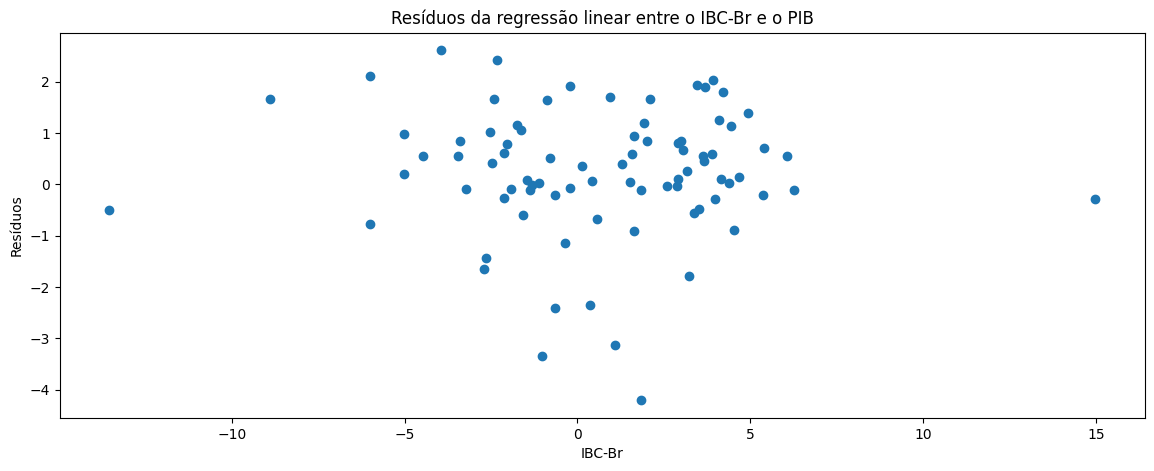

In [21]:
# Visualizando os resíduos do modelo.
plt.scatter(df['IBC-Br'], ols_model_fit.resid)
plt.title('Resíduos da regressão linear entre o IBC-Br e o PIB')
plt.xlabel('IBC-Br')
plt.ylabel('Resíduos')
plt.show()

## O IBC-Br como Preditor do PIB: Uma análise gráfica

O gráfico apresentado a seguir é o resultado de uma análise cuidadosamente estruturada para avaliar a eficácia do IBC-Br como preditor do Produto Interno Bruto (PIB). O processo utilizado para construir esta análise consiste em várias etapas críticas, detalhadas abaixo:

1. **Divisão dos dados em conjuntos de treino e teste**: Inicialmente, os dados são divididos em dois conjuntos distintos. O conjunto de treino é usado para desenvolver o modelo, enquanto o conjunto de teste serve para avaliar a sua eficácia.

2. **Aplicação da Regressão Linear através do Método dos Mínimos Quadrados Ordinários (MQO)**: Utilizamos a técnica de regressão linear, empregando o Método dos Mínimos Quadrados Ordinários, para criar um modelo que possa prever os valores futuros do PIB com base nos dados do IBC-Br. Este método é amplamente reconhecido por sua eficiência em encontrar a melhor linha de ajuste em um conjunto de dados.

3. **Elaboração do gráfico comparativo**: Por fim, construímos um gráfico que contrasta os valores previstos pelo modelo com os valores reais contidos no conjunto de teste. Esta representação visual oferece uma clara compreensão da precisão do modelo, permitindo uma avaliação direta da capacidade do IBC-Br em prever o PIB.

In [22]:
# Dividindo os dados em treino e teste.
# Taxa de divisão do DataFrame: 90% para treino e 10% para teste.
train_size  = int(len(df['PIB'])*.90)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test = df['PIB'][:train_size], df['PIB'][train_size:]
y_train, y_test = df['IBC-Br'][:train_size], df['IBC-Br'][train_size:]

In [23]:
# Treinando o modelo.
ols_model_train_fit = sm.OLS(y_train, X_train).fit()
ols_model_train_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 IBC-Br   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              818.7
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                    4.60e-41
Time:                        21:12:57   Log-Likelihood:                         -112.85
No. Observations:                  73   AIC:                                      227.7
Df Residuals:                      72   BIC:                                      230.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PIB            0.8444      0.030     28.613      0.000       0.786       0.903
==============================================================================
Omnibus:                       12.133   Durbin-Watson:                   2.947
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.829
Skew:                           0.793   Prob(JB):                     0.000993
Kurtosis:                       4.426   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Fazendo previsões com o modelo treinado.
pib_predict = ols_model_train_fit.predict(X_test)

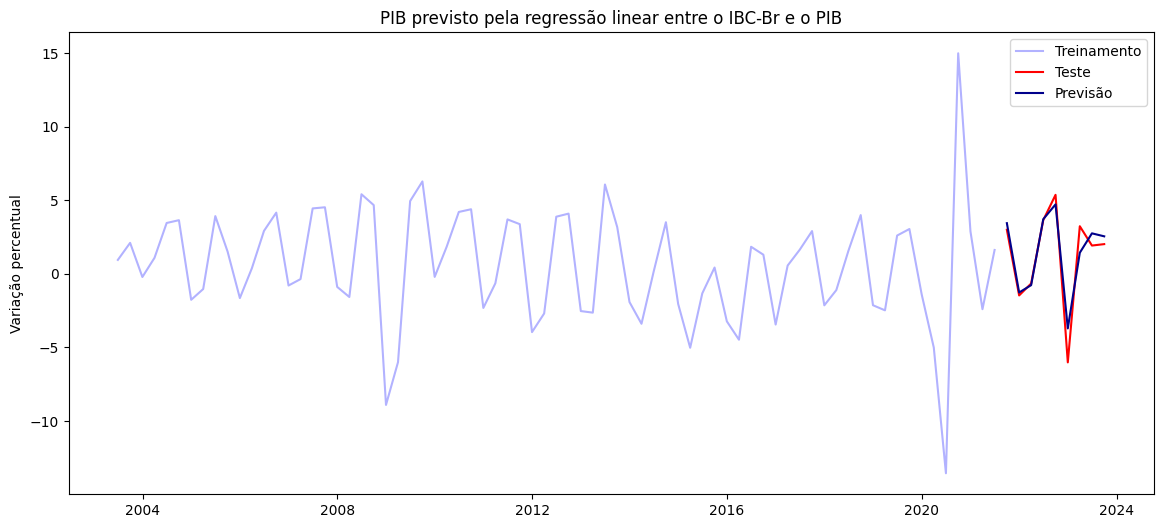

In [25]:
# montar um gráfico que mostre as observações e as previsões.
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
ax.plot(y_train, label='Treinamento', color='blue', alpha=0.3)
ax.plot(y_test, label='Teste',  color='red')
ax.plot(pib_predict, label='Previsão', color='darkblue')
ax.legend()
ax.set_title('PIB previsto pela regressão linear entre o IBC-Br e o PIB')
ax.set_ylabel('Variação percentual')
plt.show()

O gráfico sugere que o modelo utilizado para prever a variação percentual do PIB foi capaz de aprender padrões a partir dos dados históricos e que as previsões geradas alinham-se de forma coerente com o comportamento passado da série temporal. Contudo, a precisão das previsões, especialmente em face de eventos econômicos significativos e sem precedentes, sempre deve ser considerada com cautela.

## Disclaimer

O storytelling empregado neste estudo foi projetada com o intuito de tornar os dados apresentados e o método de elaboração compreensível para qualquer pessoa, independentemente de sua familiaridade com o assunto. Se você já possui conhecimento técnico em Python e/ou Ciência de Dados, sinta-se à vontade para ignorar quaisquer comentários que possam parecer redundantes ou enfadonhos.

In [26]:
# Informações sobre as versões das bibliotecas utilizadas.
print(f'Versão do Pandas: {pd.__version__}')
print(f'Versão do Sidrapy: {sd.VERSION}')
print(f'Versão do Statsmodels: {sm.__version__}')

Versão do Pandas: 2.1.3
Versão do Sidrapy: 0.1.4
Versão do Statsmodels: 0.14.0
